In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
x = wine.data
y = wine.target

In [5]:
x.shape, y.shape

((178, 13), (178,))

In [6]:
import numpy as np
np.unique(y)

array([0, 1, 2])

**조건**
1. training set/ test set/ validation set
2. scaling (min-max, standardization 둘 중)
3. y에 대한 처리
4. 히든 레이어 최소 2개 쓰기 (노드와 엑티베이션 자유)
5. early stopping, validation_data

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((160, 13), (18, 13), (160,), (18,))

In [8]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=1)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((144, 13), (16, 13), (144,), (16,))

In [9]:
train_x[:, 1].shape

(144,)

In [10]:
for i in range(train_x.shape[1]):
    min_n, max_n = train_x[:, i].min(), train_x[:, i].max()
    print(f"{i} : {min_n}, {max_n}")
    train_x[:, i] = (train_x[:, i] - min_n) / (max_n - min_n)
    val_x[:, i] = (val_x[:, i] - min_n) / (max_n - min_n)
    test_x[:, i] = (test_x[:, i] - min_n) / (max_n - min_n)
    print(f"train_x : {train_x[:, i].min()}, {train_x[:, i].max()}")

# 위에처럼 말고..
# min_n = np.min(train_x, axis=0)
# max_n = np.max(train_x, axis=0)
# train_x = (train_x - min_n) / (max_n - min_n)
# val_x = (val_x - min_n) / (max_n - min_n)
# test_x = (test_x - min_n) / (max_n - min_n)

0 : 11.03, 14.83
train_x : 0.0, 1.0
1 : 0.9, 5.51
train_x : 0.0, 1.0
2 : 1.36, 3.23
train_x : 0.0, 1.0
3 : 10.6, 30.0
train_x : 0.0, 1.0
4 : 70.0, 162.0
train_x : 0.0, 1.0
5 : 0.98, 3.88
train_x : 0.0, 1.0
6 : 0.34, 5.08
train_x : 0.0, 1.0
7 : 0.13, 0.66
train_x : 0.0, 1.0
8 : 0.41, 3.28
train_x : 0.0, 1.0
9 : 1.28, 11.75
train_x : 0.0, 1.0
10 : 0.55, 1.71
train_x : 0.0, 1.0
11 : 1.27, 4.0
train_x : 0.0, 1.0
12 : 278.0, 1680.0
train_x : 0.0, 1.0


In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
np.unique(train_y), np.unique(val_y), np.unique(test_y)

(array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]))

In [13]:
class_n = len(np.unique(train_y))
train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, val_y.shape, test_y.shape

((144, 3), (16, 3), (18, 3))

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 엮기
il = keras.layers.Input(shape=(13, ))
hl = keras.layers.Dense(512, activation='relu')(il)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
ol = keras.layers.Dense(3, activation='softmax')(hl)

# 3. 모델 선언
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 171,779
Trainable params: 171,779
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
es = EarlyStopping(
    monitor='val_loss',
    patience=7,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

In [18]:
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50, callbacks=[es])

Epoch 1/50
5/5 [==============================] - 7s 95ms/step - loss: 1.0184 - accuracy: 0.7569 - val_loss: 0.8609 - val_accuracy: 0.8750
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.7778 - accuracy: 0.9306 - val_loss: 0.5804 - val_accuracy: 0.9375
Epoch 3/50
5/5 [==============================] - 0s 16ms/step - loss: 0.5195 - accuracy: 0.9375 - val_loss: 0.3337 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.3163 - accuracy: 0.9375 - val_loss: 0.1899 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 0.1939 - accuracy: 0.9583 - val_loss: 0.1164 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.1330 - accuracy: 0.9653 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0957 - accuracy: 0.9861 - val_loss: 0.0643 - val_accuracy: 1.0000
Epoch 8/50
5/5 [===========

In [19]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 26ms/step - loss: 0.0141 - accuracy: 1.0000


[0.014092707075178623, 1.0]

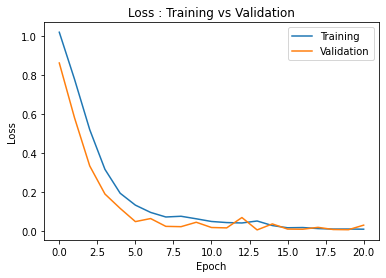

In [20]:
import matplotlib.pyplot as plt

if not isinstance(history, dict):
    history = history.history

plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [22]:
y_pred = model.predict(test_x).argmax(axis=1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0])

In [24]:
test_y.argmax(axis=1)

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0])

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

pd.DataFrame(x, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [29]:
mm.fit(x)
temp_x = mm.transform(x)
pd.DataFrame(temp_x, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
